In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pydicom
import cv2
import PIL
import matplotlib.pyplot as plt
import pandas as pd
import os
from showimage import ShowImage

# Functions

In [2]:
def remgar(image): #remove garbage
    image = image.astype(np.uint8)
    nb_components, output, stats, _ = cv2.connectedComponentsWithStats(image, connectivity = 8)
    sizes = stats[:, -1]

    max_label = 1
    max_size = sizes[1]
    for i in range(2, nb_components):
        if sizes[i] > max_size:
            max_label = i
            max_size = sizes[i]

    cleanimage = np.zeros(output.shape)
    cleanimage[output == max_label] = 255
    return cleanimage

In [3]:
def kernel(num):
    kern = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(num, num))
    return kern

In [4]:
def view(image):
    plt.imshow(image, cmap = 'gray')

In [5]:
def tophat(image, kernel):
    top_hat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
    disconnect = image - top_hat
    new_mask = remgar(disconnect)
    new_mask = np.uint8(new_mask)
    details = new_mask | top_hat
    clean = remgar(details)
    return clean

In [6]:
def close(image, num):
    kernel = np.ones((num,num),np.uint8)
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    closing = closing.astype(np.uint8)
    return closing

In [7]:
def floodfill(image):
    flood = image.copy()
    h, w = image.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
    cv2.floodFill(flood, mask, (0,0), 255);
    # Invert floodfilled image
    flood_inv = cv2.bitwise_not(flood)
    img = image | flood_inv
    return img

In [8]:
def applymask(image, mask):
    final = image.copy()
    #In a copy of the original image, clear those pixels that don't correspond to the brain
    final[mask == False] = (0,0,0)
    return final

# Image

In [9]:
path = ('D:/Uni/mri/SK_MRI/MS_dataset_full/MS/')

In [43]:
img = cv2.imread(path + '01_1/IM000019.png',3) #read img
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grayscale

# Baseline

In [44]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)

In [45]:
brain_mask = remgar(thresh)
#view(brain_mask)

In [46]:
brain_mask = np.uint8(brain_mask)

closing_1 = close(brain_mask, 5)
#view(closing)
#plt.imshow(closing, cmap = 'gray')

In [47]:
mask_1 = floodfill(closing_1)
#view(mask_1)

In [48]:
brain_1 = applymask(img, mask_1)
#view(brain_1)

# Baseline + Tophat

In [49]:
#ker = kernel(10)
clean = tophat(brain_mask, kernel(10))
#view(clean)

In [50]:
closing_2 = close(clean, 5)
#view(closing_2)

In [51]:
closing_2 = np.uint8(closing_2)
mask_2 = floodfill(closing_2)
#view(mask_1)

In [52]:
brain_2 = applymask(img, mask_2)

(Text(0.5,1,'Mask image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

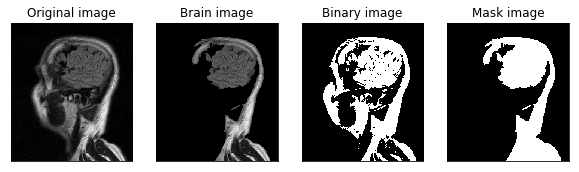

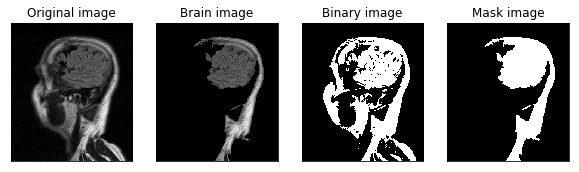

In [53]:
plt.figure(figsize=(10, 10))
plt.subplot(241),plt.imshow(img)
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(242),plt.imshow(brain_1)
plt.title('Brain image'), plt.xticks([]), plt.yticks([])
plt.subplot(243),plt.imshow(thresh,cmap = 'gray')
plt.title('Binary image'), plt.xticks([]), plt.yticks([])
plt.subplot(244),plt.imshow(mask_1, cmap = 'gray')
plt.title('Mask image'),  plt.xticks([]), plt.yticks([])

plt.figure(figsize=(10, 10))
plt.subplot(241),plt.imshow(img)
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(242),plt.imshow(brain_2)
plt.title('Brain image'), plt.xticks([]), plt.yticks([])
plt.subplot(243),plt.imshow(thresh,cmap = 'gray')
plt.title('Binary image'), plt.xticks([]), plt.yticks([])
plt.subplot(244),plt.imshow(mask_2, cmap = 'gray')
plt.title('Mask image'),  plt.xticks([]), plt.yticks([])